/var/folders/nl/qf4c7bjj6852gc3xq9q662rc0000gn/T/ipykernel_12314/1656460971.py:47: RuntimeWarning: invalid value encountered in scalar multiply
  S.propagate()


Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

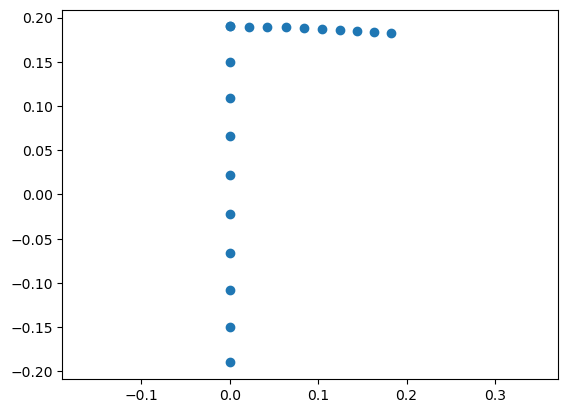

In [2]:
from pyoptools.all import *
import numpy as np

#Material using a dictionary (Schott)
material = {
    'BK7': 1.5,  # Refractive index for BK7 glass
}

#Spherical shapes for the lens
S1 = Spherical(curvature=1/100., shape=Circular(radius=20.))
S2 = Spherical(curvature=1/200., shape=Circular(radius=20.))

#Cylindrical surface (optional, adjust as needed)
S3 = Cylinder(radius=20, length=6.997)

bk7_material = material['BK7'] #lens material from Schott

#Assembling the lens component
L1 = Component(surflist=[
    (S1, (0, 0, -5), (0, 0, 0)),
    (S2, (0, 0, 5), (0, np.pi, 0)),
    (S3, (0, 0, .509), (0, 0, 0))
], material=bk7_material)

ccd = CCD(size=(10, 10), transparent=False)

#Optical system 'S' with the lens 'L1' and CCD 'ccd'
S = System(complist=[
    (L1, (0, 0, 20), (0, 0, 0)),
    (ccd, (0, 0, 150), (0, 0, 0))], n=1)

ray_positions = []

for y in np.linspace(-5, 5, num=10):
    ray_positions.append((0, y, -10)) #Vertical arm of the L

for x in np.linspace(0, 5, num=10):
    ray_positions.append((x, 5, -10)) #Horizontal arm of the L

R = [] 
for pos in ray_positions:
    R.append(Ray(pos=pos, dir=(0, 0, 1)))  #Rays pass through the lens in the z-direction

S.ray_add(R)
S.propagate()

#Generate spot diagram on the CCD
spot_diagram(ccd)
Plot3D(S)
